In [2]:
#import modules we need to use for this session
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [3]:
import swifter

In [4]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [5]:
y_test.shape

(1347450,)

In [6]:
training_data = pd.DataFrame(np.concatenate((y_train.reshape(len(y_train),1),X_train),axis=1))
training_data.columns=["y"]+["x{}".format(i) for i in range(1,18)]

test_data = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),X_test),axis=1))
test_data.columns=["y"]+["x{}".format(i) for i in range(1,18)]

In [7]:
training_data.columns

test_data.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17'],
      dtype='object')

In [8]:
#create a formulae for multi-variate regression using list comprehension
formula='y~x1+'+'+'.join(['x%d'%p for p in range(1,18)]); formula

lm12 = smf.ols(formula=formula, data = training_data).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                 2.443e+04
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:49:04   Log-Likelihood:            -8.7642e+07
No. Observations:             5389800   AIC:                         1.753e+08
Df Residuals:                 5389782   BIC:                         1.753e+08
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.137e+05   6172.658    -83.230      0.0

In [9]:
Regressors = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11','x12', 'x13', 'x14', 'x15', 'x16', 'x17']

In [10]:
mu = training_data[Regressors].mean()
sigma = training_data[Regressors].std()

In [11]:
training_data[Regressors] = (training_data[Regressors]-mu)/sigma

In [12]:
test_data[Regressors] = (test_data[Regressors]-mu)/sigma

In [13]:
training_data = training_data.fillna(0)
test_data = test_data.fillna(0)

In [14]:
training_data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,299188.0,1.447100,-0.142221,0.209442,0.161014,-0.358568,-0.081675,-0.332446,1.800014,3.085913,3.931607,0.239048,0.440879,1.821032,0.036566,-0.132415,0.016888,-1.234511
1,456000.0,-0.766191,-0.628944,-0.368441,0.100842,-0.358568,-0.364647,-0.380070,0.932093,-0.513565,0.204022,1.357014,-0.454962,-0.240147,0.011539,-0.487966,-0.157572,-0.992466
2,222000.0,-0.558695,-0.628944,-0.110330,-0.048326,-0.358568,-0.236379,-0.520641,1.800014,3.112904,4.075099,-0.081981,-0.269317,1.476334,-0.232143,-0.132415,0.016888,-1.234511
3,716000.0,-1.042853,-0.628944,0.100852,0.100842,-0.358568,-0.011909,-0.380070,0.932093,0.049788,2.155782,-0.413077,1.635528,0.040790,0.297823,-0.432193,-0.137370,-0.974557
4,558000.0,-1.042853,-0.628944,0.335499,0.100842,-0.358568,-0.204311,-0.633097,0.932093,0.601144,0.200521,0.136266,0.311391,0.607561,-0.035340,-0.487966,-0.155122,-1.163417


In [15]:
test_data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,539000.0,-1.042853,-0.628944,0.030458,-0.495828,-0.299622,-0.076043,-0.380070,-1.671673,-0.312275,0.460715,2.689663,-0.762667,0.037863,0.111199,-0.487966,-0.159630,-0.789496
1,175984.0,1.516266,1.317947,-0.032971,-1.408497,1.291927,0.060250,-0.206589,0.064171,-0.708129,-0.649049,-0.877533,-0.033290,-0.997294,-0.916648,-0.362478,-0.147293,0.693163
2,359000.0,-0.420365,-0.628944,0.335499,0.071008,-0.358568,-0.140177,-0.042701,1.800014,1.860830,0.088781,0.045723,-0.982755,0.851874,0.526780,0.508971,-0.051543,1.403558
3,143000.0,-0.005372,1.804669,-0.462300,-0.644995,-0.240676,-0.300513,-0.070815,-0.803751,-0.761913,-0.484944,-0.941352,-1.028632,-1.088937,-1.194266,-0.160301,-0.111124,0.374597
4,771000.0,-0.212868,-0.628944,-0.251118,-0.048326,-0.358568,-0.204311,0.603924,-0.803751,-0.216709,-0.709773,-0.946298,2.065542,-1.125344,-1.219678,-0.453108,-0.158387,0.228068


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_alpha(model,X_train,y_train,X_test,y_test,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #aplhas: a list of aplha values to try
    #Graph: plot the graph of R^2 values for different alpha

    R_2_OS=[] #out of sample R2's
    
    #initialize the model to use for each given alpha
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_alpha = alphas[0]
    best_coefs = []
    
    for a in alphas: #for all alphas to try
        lm = RM(a) #assign the model
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_test) #compute the prediction for the test sample 
        R_2_OS_=r2_score(y_test,y_predict)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2: #if current OS R2 is the best - update the best solution
            best_R2 = R_2_OS_
            best_alpha = a
            best_coefs = lm.coef_
    
    if Graph==True: #visualization of the performance depending on alpha
        plt.title('OS-R-squared for different Alpha')
        if logl: #log-scale
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.ylim((-0.1,1))
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return [best_alpha,best_R2,best_coefs]

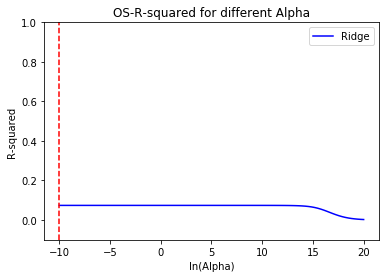

Optimal alpha for Ridge=4.5399929762484854e-05, best OS R_2=0.0740553462612058


In [18]:
alphas = np.exp(np.linspace(-10,20,100)) #exponential range of possible alphas
[alpha_optimalRidge, best_R2, best_coefs]=Regularization_fit_alpha(1,training_data[Regressors],training_data.y,test_data[Regressors],test_data.y,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimalRidge,best_R2))

In [19]:
#try Ridge with an arbitrary regularization parameter alpha=1
Ridge=linear_model.Ridge(fit_intercept=True, alpha=alpha_optimalRidge)
Ridge.fit(training_data[Regressors],training_data.y)
# In sample:
YPred_IS=Ridge.predict(training_data[Regressors])
print("The IS R-squared of Ridge is: {0}".format(r2_score(training_data.y,YPred_IS)))
#Out of sample
YPred_OS=Ridge.predict(test_data[Regressors])
print("The test R-squared of Ridge is: {0}".format(r2_score(test_data.y,YPred_OS)))
#Lasso.coef_

The IS R-squared of Ridge is: 0.07155226233539436
The test R-squared of Ridge is: 0.0740553462612058


In [20]:
Ridge.coef_

array([-145669.5647508 ,   27987.572586  ,  305208.54273938,
        375059.43006826,    1814.8611261 ,  276766.9894591 ,
        156272.10297201,    4165.95550147,    -709.36307399,
       -138063.91384674,    3567.37366471, -100564.46726121,
        -26428.9508884 ,  -23459.55702057,   -1103.67192975,
         23636.2794792 ,  -21230.62953515])

In [21]:
Ridge.coef_.shape

(17,)

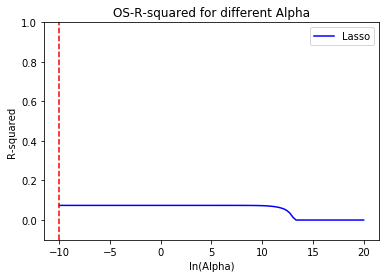

Optimal alpha for Lasso=4.5399929762484854e-05, best OS R_2=0.07405534625969257


In [22]:
alphas = np.exp(np.linspace(-10,20,100)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,training_data[Regressors],training_data.y,test_data[Regressors],test_data.y,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [23]:
Lasso=linear_model.Lasso(fit_intercept=True, alpha=alpha_optimal)

Lasso.fit(training_data[Regressors],training_data.y)
# In sample:
YPred_IS=Lasso.predict(training_data[Regressors])
print("The IS R-squared of Lasso is: {0}".format(r2_score(training_data.y,YPred_IS)))
#Out of sample
YPred_OS=Lasso.predict(test_data[Regressors])
print("The OS R-squared of Lasso is: {0}".format(r2_score(test_data.y,YPred_OS)))
Lasso.coef_

The IS R-squared of Lasso is: 0.07155226233539524
The OS R-squared of Lasso is: 0.07405534625969257


array([-145669.56457612,   27987.57248057,  305208.54272345,
        375059.4300332 ,    1814.86106548,  276766.9894431 ,
        156272.10295215,    4165.95541245,    -709.36302363,
       -138063.91371913,    3567.37351731, -100564.46722508,
        -26428.95078802,  -23459.55698733,   -1103.67185091,
         23636.27942417,  -21230.62949368])

In [ ]:
fig, ax = plt.subplots() #get axis to plot on
#ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
#REStaten_.plot(x='LAND_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)
test_data.plot(ax=ax,kind='scatter',x='predictions',y='y', title = 'Test Data Prediction Fit') #show the data
ax.plot(test_data.predictions,test_data.predictions,'r-'); #show the regression line
plt.show()

In [ ]:
# regression_equation = 'y~ {} x1+'.format(lm12.params)+'+'.join(['x%d'%p for p in range(1,18)])
# regression_equation

In [ ]:
#trial = df_concat[['FULLVAL', 'nearest_subway_entrance', 'nearest_park', 'normalized_arrest_cnt']].copy()

In [ ]:
dataset = pd.read_feather('C:\\Users\\aniha\\OneDrive - nyu.edu\\final_reg_data.feather')#, dtype={'BIN': 'float64', 'EXMPTCL': 'object', 'EXT': 'object', 'BBLE': 'object',
#        'EASEMENT': 'object',
#        'POSTCODE': 'float64'})

# dataset = pd.

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset.columns

In [ ]:
dataset = dataset[dataset.FULLVAL != 0]

In [ ]:
dataset.shape

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.shape

In [ ]:
6821660 - 6032650

In [ ]:
edited_dataset = dataset[['FULLVAL', 'nearest_subway_entrance', 'nearest_park', 'normalized_arrest_cnt']].copy()

In [ ]:
edited_dataset.shape

In [ ]:
print (len(edited_dataset.index))

In [ ]:
training, validation, testing = np.split(dataset.sample(frac=1, random_state=324), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
training.head()

In [ ]:
import gc
gc.collect()

In [ ]:
lm = smf.ols(formula='FULLVAL~nearest_subway_entrance+nearest_park+normalized_arrest_cnt', data = training).fit()
print(lm.summary())

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(training.corr())
plt.show()

corr = training.corr()

In [ ]:
print(corr)

In [ ]:
training = training.fillna(0)
validation = validation.fillna(0)
testing = testing.fillna(0)

In [ ]:
lm = smf.ols(formula='FULLVAL~nearest_subway_entrance+nearest_park+normalized_arrest_cnt', data = training).fit()
print(lm.summary())

In [ ]:
training['prediction'] = lm.predict()
training.head()

In [ ]:
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
training.plot(ax=ax,kind='scatter',x='prediction',y='FULLVAL') #show the data
ax.plot(training.prediction,training.prediction,'r-'); #show the regression line

In [ ]:
correlation_table = training[['STORIES','nearest_grocery','nearest_subway_entrance','nearest_basketball_court','nearest_daycare_facility', 'nearest_athletic_facility', 'nearest_park', 'total_arrests', 'normalized_arrest_cnt', 'FULLVAL']].corr()

In [ ]:
correlation_table.sort_values(by = 'FULLVAL', ascending = 0)